In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from arch import arch_model
from datetime import datetime
import yfinance as yf


In [8]:
ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2023-12-31")[["Close"]].dropna()
data.columns = [ticker]
data.index = pd.to_datetime(data.index)
data = data.asfreq('B').dropna()

# Calculate log returns
data["LogReturn"] = np.log(data[ticker] / data[ticker].shift(1))
returns = data["LogReturn"].dropna()




[*********************100%***********************]  1 of 1 completed


In [9]:
train = returns[:'2022']
test = returns['2023':]


In [10]:
garch_model = arch_model(train, vol='Garch', p=1, q=1, rescale=False)
model_result = garch_model.fit(disp='off')
print(model_result.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:              LogReturn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                5347.13
Distribution:                  Normal   AIC:                          -10686.3
Method:            Maximum Likelihood   BIC:                          -10663.8
                                        No. Observations:                 2013
Date:                Tue, Jun 24 2025   Df Residuals:                     2012
Time:                        16:04:54   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.6566e-03  2.397e-06    691.048      0.000 [1.

In [11]:
forecast = model_result.forecast(horizon=len(test))
volatility = np.sqrt(forecast.variance.values[-1, :])


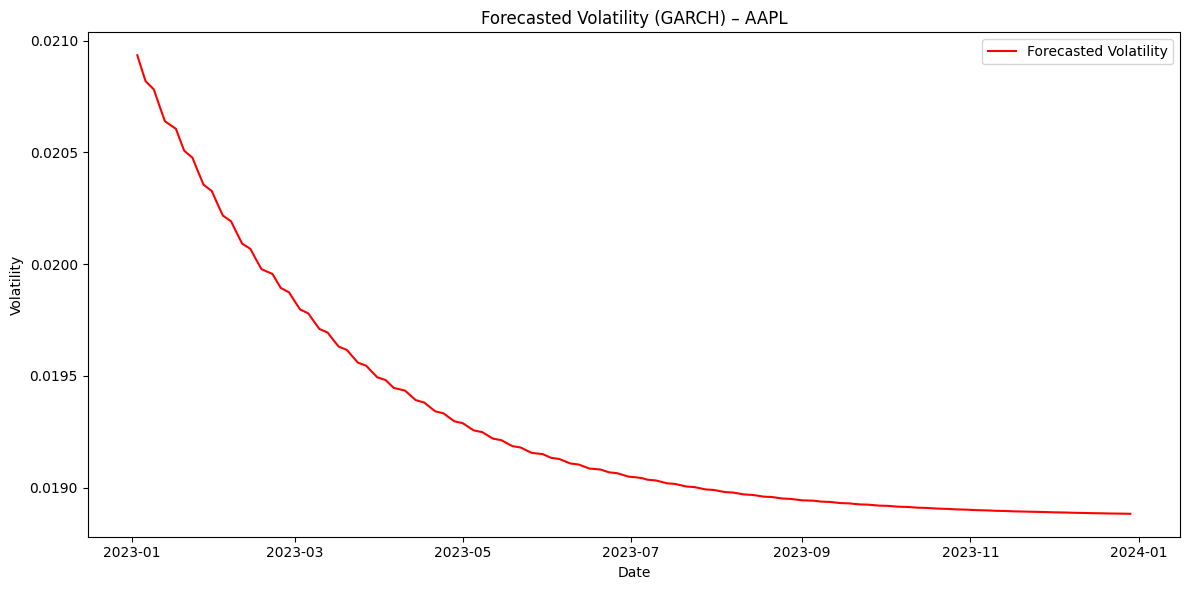

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, volatility, label='Forecasted Volatility', color='red')
plt.title("Forecasted Volatility (GARCH) – AAPL")
plt.ylabel("Volatility")
plt.xlabel("Date")
plt.legend()
plt.tight_layout()
plt.savefig("../output/aapl_garch_volatility.png", dpi=300)
plt.show()


In [13]:
vol_df = pd.DataFrame({'Date': test.index, 'ForecastedVolatility': volatility})
vol_df.set_index('Date', inplace=True)
vol_df.to_csv("../output/aapl_garch_volatility.csv")
